In [7]:
%pip install seaborn
%pip install pandas
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, re
from collections import Counter


In [9]:

petitions_2011 = pd.read_excel("petition_results (9).xlsx")
responses_2011 = pd.read_excel("response_results (2).xlsx")

print("Petitions shape:", petitions_2011.shape)
print("Responses shape:", responses_2011.shape)

petitions_2011.head()

Petitions shape: (129, 9)
Responses shape: (120, 7)


,File Name,Date of Petition,Date Comments,Identity of Submitting Entity,Representation Details,Cited Statutes or Regulations,FDA Action Commented On,Requested Action,Justification for Request
0,FDA-2011-P-0018-0001_Dwayne_A__Ratleff___Citiz...,2010-12-22,Not Mentioned,Dwayne ARatl:7f (individual petitioner),Self-filed by Dwayne ARatl:7f,"[""21 CFR 5.10"", ""21 U.S.C. § 321(m)"", ""21 CFR ...",Regulation of electronic versions of ingredien...,Amend SEC. 201 to include electronic versions ...,To keep pace with emerging technology and main...
1,FDA-2011-P-0022-0008_Citizen_Petition_Denial_R...,2011-01-07,Not Mentioned,Waxler Regulatory Consultancy LLC,Self-filed by Waxler Regulatory Consultancy LLC,"[""21 CFR 515(e)(l)"", ""21 CFR 814.46(a)"", ""Sect...",PMA approval and labeling for LASIK devices,Withdraw premarket approval (PMA) for all lase...,Cited data from several approved PMA applicati...
2,FDA-2011-P-0022-0009_Petition_for_Reconsiderat...,2014-07-22,Not Mentioned,"Morris Waxler, Ph.D.","Self-filed by Morris Waxler, Ph.D.","[""21 CFR 10.33"", ""21 U.S.C. § 355""]",Decision to deny the petition for withdrawal o...,Reconsideration and initiation of an action pl...,The petition argues that FDA's decision undere...
3,FDA-2011-P-0022-0011_Reconsideration_Petition_...,2014-07-22,Not Mentioned,Waxler Regulatory Consultancy LLC,Self-filed by Waxler Regulatory Consultancy LLC,"[""Not Mentioned""]",Denial of Citizen Petition regarding LASIK exc...,Reconsider decision to deny petition and withd...,Not explicitly detailed in the provided document
4,FDA-2011-P-0031-0004_Petition_Approval_Respons...,2011-01-12,Not Mentioned,"Samson Medical Technologies, L.L.C.","Self-filed by Samson Medical Technologies, L.L.C.","[""21 CFR 314.94(a)(3)(iii)"", ""Section 505 of t...",Petition for ANDA approval,Approval to file an ANDA for Piperacillin and ...,Change in strength does not pose questions of ...


In [10]:
responses_2011.head()

,File Name,Date of Response,Date Comments,Responding FDA Center,Response to Petition,Cited Statutes or Regulations,Justification for Response
0,FDA-2011-P-0022-0004_FDA_Interim_Response_to_W...,2011-08-31,Not Mentioned,CDRH,other: interim response provided,"[""21 CFR 10.30(e)(2))""]",Further review and analysis by agency official...
1,FDA-2011-P-0022-0013_Reconsideration_Denial_le...,2016-10-02,Not Mentioned,Not Mentioned,denied,"[""21 CFR 10.33(d)"", ""Section 515(e)(l)(A) of t...",The FDA determined that the reconsideration pe...
2,FDA-2011-P-0025-0003_FDA_CDER_Interim_Response...,2011-07-31,Not Mentioned,CDER,other: interim response,"[""21 CFR 10.30(e)(2)""]",FDA has not yet resolved the issues due to oth...
3,FDA-2011-P-0032-0004_Anika_Therapeutics__Inc__...,Not Mentioned,2011-03-25,Not Mentioned,withdrawn,"[""18 U.S.C. § 1905"", ""18 U.S.C. § 331(j)"", ""21...",Petition for Reconsideration withdrawn by Anik...
4,FDA-2011-P-0047-0012_FDA_CDER_Interim_Response...,2011-07-20,Not Mentioned,CDER,other: interim response provided due to other ...,"[""21 CFR 1O.30(e)(2)""]",The issues raised in the petition have not yet...


In [20]:
# Keep responses within ~200 days (tweak the threshold as needed)
FAST_THRESHOLD = 200

fast = (
    merged_table
    .copy()
    .query("Response_Days.notna()")
    .query("Response_Days >= 0 and Response_Days <= @FAST_THRESHOLD")
    .sort_values("Response_Days")
)

# Select the most informative columns that you have
cols = [
    "Docket_ID", "Date of Petition", "Date of Response", "Response_Days",
    "File Name_petition", "File Name_response",
]
# Add response category if present
for c in ["Response to Petition", "Responding FDA Center", "Response_Category"]:
    if c in merged_table.columns:
        cols.append(c)

fast_display = fast[[c for c in cols if c in fast.columns]]
print(f"Found {len(fast_display)} fast petition→response pairs (≤ {FAST_THRESHOLD} days).")
fast_display.head(20)

Found 43 fast petition→response pairs (≤ 200 days).


,Docket_ID,Date of Petition,Date of Response,Response_Days,File Name_petition,File Name_response,Response to Petition,Responding FDA Center
39,FDA-2011-P-0460,2011-06-07,2011-08-25,79.0,FDA-2011-P-0460-0001_Citizen_Petition_from_Lac...,FDA-2011-P-0460-0004_Response_Letter_from_FDA_...,approved,CDER
68,FDA-2011-P-0646,2015-09-08,2015-12-03,86.0,FDA-2011-P-0646-0008_Amended_Citizen_Petition_...,FDA-2011-P-0646-0031_Interim_Response_Letter_f...,"other: tentative response, further evaluation ...",CFSAN
19,FDA-2011-P-0115,2011-02-24,2011-07-08,134.0,FDA-2011-P-0115-0001_Cypress_Pharmaceutical__I...,FDA-2011-P-0115-0005_Cypress_Pharmaceutical__I...,withdrawn,Not Mentioned
45,FDA-2011-P-0488,2011-06-21,2011-11-22,154.0,FDA-2011-P-0488-0001_Sandoz__Inc____Citizen_Pe...,FDA-2011-P-0488-0004_FDA_CDER_to_Sandoz__Inc__...,approved,CDER
26,FDA-2011-P-0226,2011-03-30,2011-09-01,155.0,FDA-2011-P-0226-0001_Hyman__Phelps___McNamara_...,FDA-2011-P-0226-0003_Interim_Response_to_Hyman...,other: interim response provided due to other ...,CDER
73,FDA-2011-P-0717,2011-09-29,2012-03-07,160.0,FDA-2011-P-0717-0004_FDA_CDER_to_Cooley_LLP_Pe...,FDA-2011-P-0717-0003_Interim_Response_to_Coole...,other: interim response,CDER
72,FDA-2011-P-0717,2011-09-29,2012-03-07,160.0,FDA-2011-P-0717-0001_Cooley_LLP___Citizen_Peti...,FDA-2011-P-0717-0003_Interim_Response_to_Coole...,other: interim response,CDER
71,FDA-2011-P-0660,2011-08-31,2012-02-07,160.0,FDA-2011-P-0660-0001_RegulatoryPro_com___Citiz...,FDA-2011-P-0660-0003_FDA_CDRH_interim_response...,other: interim response,CDRH
34,FDA-2011-P-0356,2011-05-11,2011-10-25,167.0,FDA-2011-P-0356-0027_Citizen_Petition_Final_Re...,FDA-2011-P-0356-0023_FDA_CTP_Interim_Response_...,other: interim response provided in accordance...,CTP
66,FDA-2011-P-0641,2011-08-25,2012-02-10,169.0,FDA-2011-P-0641-0007_Citizen_Petition_Denial_R...,FDA-2011-P-0641-0005_FDA_CDRH_Interim_Response...,other: interim response,CDRH


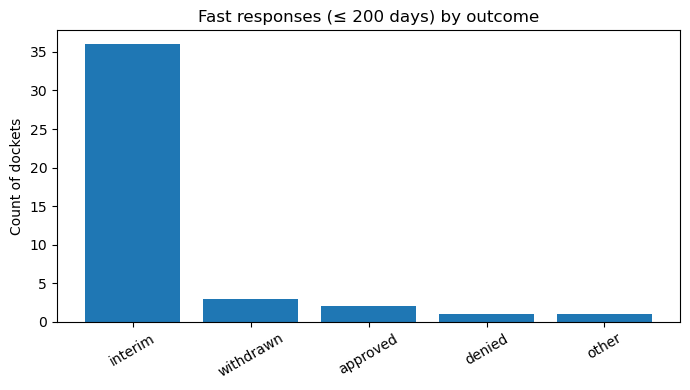

In [21]:
# If your response category is already computed:
if "Response_Category" not in fast.columns and "Response to Petition" in fast.columns:
    def classify_response(text):
        if pd.isna(text): return "missing"
        t = str(text).lower()
        if "approved" in t: return "partially approved" if "partially" in t else "approved"
        if "denied" in t: return "denied"
        if "withdraw" in t: return "withdrawn"
        if any(k in t for k in ["interim","tentative","pending","review","evaluating"]): return "interim"
        if "other" in t: return "other"
        return "uncategorized"
    fast["Response_Category"] = fast["Response to Petition"].apply(classify_response)

counts = fast["Response_Category"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(7,4))
plt.bar(counts.index, counts.values)
plt.title(f"Fast responses (≤ {FAST_THRESHOLD} days) by outcome")
plt.ylabel("Count of dockets")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [22]:
# 1️⃣ Extract Docket IDs if not already done
if "Docket_ID" not in petitions_2011.columns:
    petitions_2011["Docket_ID"] = petitions_2011["File Name"].str.extract(r"(FDA-\d{4}-P-\d{4})")
if "Docket_ID" not in responses_2011.columns:
    responses_2011["Docket_ID"] = responses_2011["File Name"].str.extract(r"(FDA-\d{4}-P-\d{4})")

# 2️⃣ Merge by Docket_ID
merged_table = pd.merge(
    petitions_2011,
    responses_2011,
    on="Docket_ID",
    how="inner",
    suffixes=("_petition", "_response")
)

# 3️⃣ Clean up and reorder columns for readability
cols_order = [
    "Docket_ID",
    "File Name_petition",
    "Date of Petition",
    "Identity of Submitting Entity",
    "Requested Action",
    "Justification for Request",
    "File Name_response",
    "Date of Response",
    "Responding FDA Center",
    "Response to Petition",
    "Justification for Response"
]
merged_table = merged_table[[c for c in cols_order if c in merged_table.columns]]

# 4️⃣ Compute response time (in days)
merged_table["Date of Petition"] = pd.to_datetime(merged_table["Date of Petition"], errors="coerce")
merged_table["Date of Response"] = pd.to_datetime(merged_table["Date of Response"], errors="coerce")
merged_table["Response_Days"] = (merged_table["Date of Response"] - merged_table["Date of Petition"]).dt.days

# 5️⃣ Display merged results
print("Merged table shape:", merged_table.shape)
merged_table.head(10)


Merged table shape: (87, 12)


,Docket_ID,File Name_petition,Date of Petition,Identity of Submitting Entity,Requested Action,Justification for Request,File Name_response,Date of Response,Responding FDA Center,Response to Petition,Justification for Response,Response_Days
0,FDA-2011-P-0022,FDA-2011-P-0022-0008_Citizen_Petition_Denial_R...,2011-01-07,Waxler Regulatory Consultancy LLC,Withdraw premarket approval (PMA) for all lase...,Cited data from several approved PMA applicati...,FDA-2011-P-0022-0004_FDA_Interim_Response_to_W...,2011-08-31,CDRH,other: interim response provided,Further review and analysis by agency official...,236.0
1,FDA-2011-P-0022,FDA-2011-P-0022-0008_Citizen_Petition_Denial_R...,2011-01-07,Waxler Regulatory Consultancy LLC,Withdraw premarket approval (PMA) for all lase...,Cited data from several approved PMA applicati...,FDA-2011-P-0022-0013_Reconsideration_Denial_le...,2016-10-02,Not Mentioned,denied,The FDA determined that the reconsideration pe...,2095.0
2,FDA-2011-P-0022,FDA-2011-P-0022-0009_Petition_for_Reconsiderat...,2014-07-22,"Morris Waxler, Ph.D.",Reconsideration and initiation of an action pl...,The petition argues that FDA's decision undere...,FDA-2011-P-0022-0004_FDA_Interim_Response_to_W...,2011-08-31,CDRH,other: interim response provided,Further review and analysis by agency official...,-1056.0
3,FDA-2011-P-0022,FDA-2011-P-0022-0009_Petition_for_Reconsiderat...,2014-07-22,"Morris Waxler, Ph.D.",Reconsideration and initiation of an action pl...,The petition argues that FDA's decision undere...,FDA-2011-P-0022-0013_Reconsideration_Denial_le...,2016-10-02,Not Mentioned,denied,The FDA determined that the reconsideration pe...,803.0
4,FDA-2011-P-0022,FDA-2011-P-0022-0011_Reconsideration_Petition_...,2014-07-22,Waxler Regulatory Consultancy LLC,Reconsider decision to deny petition and withd...,Not explicitly detailed in the provided document,FDA-2011-P-0022-0004_FDA_Interim_Response_to_W...,2011-08-31,CDRH,other: interim response provided,Further review and analysis by agency official...,-1056.0
5,FDA-2011-P-0022,FDA-2011-P-0022-0011_Reconsideration_Petition_...,2014-07-22,Waxler Regulatory Consultancy LLC,Reconsider decision to deny petition and withd...,Not explicitly detailed in the provided document,FDA-2011-P-0022-0013_Reconsideration_Denial_le...,2016-10-02,Not Mentioned,denied,The FDA determined that the reconsideration pe...,803.0
6,FDA-2011-P-0032,FDA-2011-P-0032-0001_Anika_Therapeutics__Inc__...,2011-01-10,"Anika Therapeutics, Inc.",Reconsideration and review by an independent a...,Data supports the need for reconsideration,FDA-2011-P-0032-0004_Anika_Therapeutics__Inc__...,NaT,Not Mentioned,withdrawn,Petition for Reconsideration withdrawn by Anik...,NaN
7,FDA-2011-P-0047,FDA-2011-P-0047-0001_InvaGen_Pharmaceuticals__...,2011-01-14,InvaGen Pharmaceuticals Inc.,Confirm that Pfizer's Antivert chewable tablet...,The discontinuation status of Pfizer's Antiver...,FDA-2011-P-0047-0012_FDA_CDER_Interim_Response...,2011-07-20,CDER,other: interim response provided due to other ...,The issues raised in the petition have not yet...,187.0
8,FDA-2011-P-0047,FDA-2011-P-0047-0001_InvaGen_Pharmaceuticals__...,2011-01-14,InvaGen Pharmaceuticals Inc.,Confirm that Pfizer's Antivert chewable tablet...,The discontinuation status of Pfizer's Antiver...,FDA-2011-P-0047-0013_Response_Letter_from_FDA_...,2019-01-19,CDER,partially approved,The petitions are granted to the extent that F...,2927.0
9,FDA-2011-P-0055,FDA-2011-P-0055-0013_Citizen_Petition_Denial_R...,2011-01-19,Joseph M. Carik and Amber Britton (individual ...,Require Genzyme Corporation to allocate full d...,To ensure equitable distribution and availabil...,FDA-2011-P-0055-0012_FDA_CDER_Interim_Response...,2011-07-15,CDER,other: interim response provided,Complex issues requiring extensive review and ...,177.0


In [23]:
# Count how many petition files per docket
petition_counts = petitions_2011.groupby("Docket_ID").size().reset_index(name="Petition_Count")

# Count how many response files per docket
response_counts = responses_2011.groupby("Docket_ID").size().reset_index(name="Response_Count")

# Merge the two counts
docket_summary = pd.merge(petition_counts, response_counts, on="Docket_ID", how="outer").fillna(0)

# Sort by total number of files
docket_summary["Total_Documents"] = docket_summary["Petition_Count"] + docket_summary["Response_Count"]
docket_summary = docket_summary.sort_values("Total_Documents", ascending=False)

# Show top 10 dockets with most documents
docket_summary.head(10)


,Docket_ID,Petition_Count,Response_Count,Total_Documents
11,FDA-2011-P-0081,1.0,5.0,6.0
62,FDA-2011-P-0512,3.0,2.0,5.0
1,FDA-2011-P-0022,3.0,2.0,5.0
77,FDA-2011-P-0596,1.0,3.0,4.0
9,FDA-2011-P-0064,2.0,1.0,3.0
101,FDA-2011-P-0727,2.0,1.0,3.0
113,FDA-2011-P-0798,1.0,2.0,3.0
98,FDA-2011-P-0717,2.0,1.0,3.0
88,FDA-2011-P-0657,2.0,1.0,3.0
20,FDA-2011-P-0150,1.0,2.0,3.0


In [24]:
# Most common responding centers in 2011
center_counts = (
    responses_2011["Responding FDA Center"]
    .dropna()
    .value_counts()
    .reset_index()
)
center_counts.columns = ["Responding FDA Center", "Count"]
center_counts


,Responding FDA Center,Count
0,CDER,64
1,Not Mentioned,22
2,CDRH,16
3,CFSAN,12
4,CTP,3
5,OOD,1
6,CVM,1
7,"CDER, CVM",1


In [25]:
# Most common requested actions in petitions
action_counts = (
    petitions_2011["Requested Action"]
    .dropna()
    .value_counts()
    .reset_index()
)
action_counts.columns = ["Requested Action", "Count"]
action_counts


,Requested Action,Count
0,Amend SEC. 201 to include electronic versions ...,1
1,Withdraw premarket approval (PMA) for all lase...,1
2,Reconsideration and initiation of an action pl...,1
3,Reconsider decision to deny petition and withd...,1
4,Approval to file an ANDA for Piperacillin and ...,1
...,...,...
124,Refrain from taking administrative action agai...,1
125,Determine whether Fundescein-25 was voluntaril...,1
126,Expedite review of suitability petition,1
127,Approve petition for filing ANDA with a differ...,1


In [26]:
# Top submitting entities
entity_counts = (
    petitions_2011["Identity of Submitting Entity"]
    .dropna()
    .value_counts()
    .reset_index()
)
entity_counts.columns = ["Submitting Entity", "Count"]
entity_counts


,Submitting Entity,Count
0,Actavis Inc.,4
1,"Hospira, Inc.",3
2,"Dr. S. Albert Edwards, PharmD, RAC, FRAPS (ind...",3
3,B Braun Medical Inc.,3
4,AstraZeneca Pharmaceuticals LP,3
...,...,...
94,"G. Scott Crowther, PE",1
95,The undersigned (individual petitioner),1
96,"Hyman, Phelps & McNamara, P.C.",1
97,Novartis,1


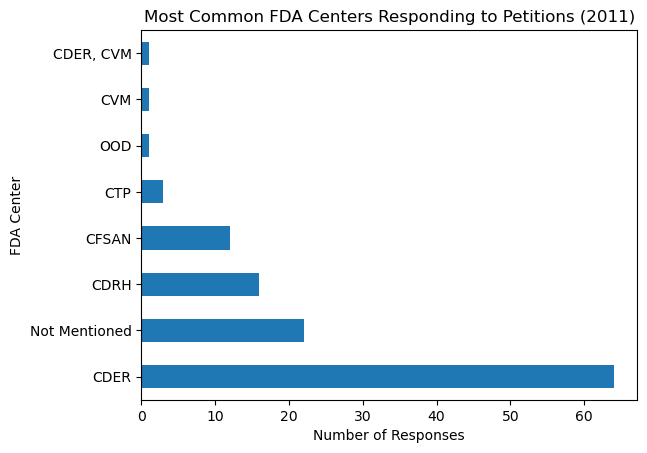

In [27]:
import matplotlib.pyplot as plt

center_counts.plot(kind="barh", x="Responding FDA Center", y="Count", legend=False)
plt.title("Most Common FDA Centers Responding to Petitions (2011)")
plt.xlabel("Number of Responses")
plt.ylabel("FDA Center")
plt.show()


In [29]:
responses_2011["Response to Petition"].dropna().unique()


array(['other: interim response provided', 'denied',
       'other: interim response', 'withdrawn',
       'other: interim response provided due to other priorities',
       'partially approved',
       'other: interim response provided due to other Agency priorities',
       'approved',
       'other: Request for Reconsideration and Additional Information Submission',
       'other: Suspension of Approval and Determination',
       'other: Withdrawal of hearing request',
       'other: [voluntarily withdrawn without prejudice to resubmission]',
       'other: voluntarily withdrawn without prejudice to resubmission',
       'other: interim response provided in accordance with FDA regulations on citizen petitions',
       'other: currently evaluating petition', 'Not Mentioned',
       'other: interim response provided in accordance with FDA regulations on citizen petitions (21 CFR 10.30(e)(2))',
       'other: petition under active evaluation',
       'other: evaluating information rela

In [30]:
import pandas as pd

# --- 0) Pick the already-loaded responses table (no re-reading files) ---
try:
    df_resp = responses_201.copy()
except NameError:
    df_resp = responses_2011.copy()

# Detect the column that holds the outcome text
resp_col = None
for c in df_resp.columns:
    if c.strip().lower() == "response to petition":
        resp_col = c
        break
if resp_col is None:
    raise KeyError("Couldn't find a 'Response to Petition' column in your responses table.")

# --- 1) Classify outcomes (tuned to your actual unique values) ---
def classify_response(text):
    if pd.isna(text):
        return "missing"
    t = str(text).lower()
    # approvals first
    if "approved" in t:
        return "partially approved" if "partially" in t else "approved"
    # denials, withdrawals
    if "denied" in t:
        return "denied"
    if "withdraw" in t:
        return "withdrawn"
    # interim / pending / review
    if any(k in t for k in ["interim", "tentative", "pending", "review", "evaluating"]):
        return "interim"
    # generic "other"
    if "other" in t:
        return "other"
    return "uncategorized"

df_resp["Response_Category"] = df_resp[resp_col].apply(classify_response)

# --- 2) Counts and rates (force numeric to avoid the TypeError) ---
category_counts = (
    df_resp["Response_Category"]
    .value_counts(dropna=False)
    .rename_axis("Response_Category")
    .reset_index(name="Count")
)

# ensure numeric
category_counts["Count"] = pd.to_numeric(category_counts["Count"], errors="coerce").fillna(0).astype(int)
total = int(category_counts["Count"].sum())
category_counts["Rate (%)"] = (category_counts["Count"] / (total if total else 1) * 100).round(2)

# Order by most frequent
category_counts = category_counts.sort_values("Count", ascending=False).reset_index(drop=True)

print("Outcome breakdown:")
display(category_counts)

# --- 3) Roll-ups you asked for: approval, denial, withdrawn, interim ---
approved_full   = (df_resp["Response_Category"] == "approved").sum()
approved_part   = (df_resp["Response_Category"] == "partially approved").sum()
denied_cnt      = (df_resp["Response_Category"] == "denied").sum()
withdrawn_cnt   = (df_resp["Response_Category"] == "withdrawn").sum()
interim_cnt     = (df_resp["Response_Category"] == "interim").sum()

# define denominator: only rows with a concrete category (exclude 'missing' if present)
denom = (df_resp["Response_Category"].notna()).sum()
summary = pd.DataFrame({
    "Metric": [
        "Approval (full + partial)",
        "Denial",
        "Withdrawn",
        "Interim / Pending"
    ],
    "Count": [
        approved_full + approved_part,
        denied_cnt,
        withdrawn_cnt,
        interim_cnt
    ]
})
summary["Rate (%)"] = (summary["Count"] / (denom if denom else 1) * 100).round(2)

print("\nKey rates:")
display(summary)

# --- 4) (Optional) See what fell into 'uncategorized' so you can refine mapping ---
uncat_examples = (
    df_resp.loc[df_resp["Response_Category"] == "uncategorized", [resp_col]]
    .dropna()
    .drop_duplicates()
    .head(20)
)
if len(uncat_examples):
    print("\nSample of 'uncategorized' raw texts (first 20):")
    display(uncat_examples)


Outcome breakdown:


,Response_Category,Count,Rate (%)
0,interim,62,51.67
1,withdrawn,17,14.17
2,denied,14,11.67
3,partially approved,10,8.33
4,approved,9,7.50
5,other,5,4.17
6,uncategorized,3,2.50



Key rates:


,Metric,Count,Rate (%)
0,Approval (full + partial),19,15.83
1,Denial,14,11.67
2,Withdrawn,17,14.17
3,Interim / Pending,62,51.67



Sample of 'uncategorized' raw texts (first 20):


,Response to Petition
33,Not Mentioned


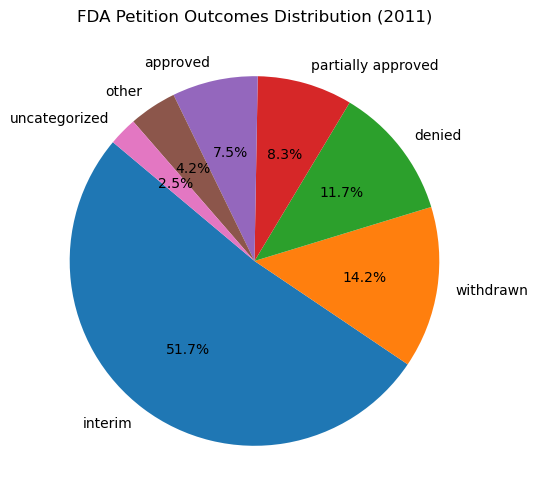

In [31]:
plt.figure(figsize=(6, 6))
plt.pie(
    category_counts["Rate (%)"],
    labels=category_counts["Response_Category"],
    autopct="%1.1f%%",
    startangle=140
)
plt.title("FDA Petition Outcomes Distribution (2011)")
plt.show()


Merged dockets with valid dates: 39


,Count,Rate (%)
Speed_Bucket,,
≤180,19,48.72
181–200,13,33.33
201–365,1,2.56
366–730,3,7.69
>730,3,7.69


Speed_Bucket,≤180,181–200,201–365,366–730,>730
Outcome_Rollup,,,,,
approved,40.0,0.00,0.00,40.00,20.00
denied,0.0,100.00,0.00,0.00,0.00
interim,50.0,36.67,3.33,3.33,6.67
other,0.0,100.00,0.00,0.00,0.00
withdrawn,100.0,0.00,0.00,0.00,0.00


Speed_Bucket,≤180,181–200,201–365,366–730,>730
FDA_Center,,,,,
CDER,38.46,42.31,0.00,11.54,7.69
CDRH,66.67,0.00,16.67,0.00,16.67
CFSAN,100.00,0.00,0.00,0.00,0.00
CTP,100.00,0.00,0.00,0.00,0.00
CVM,100.00,0.00,0.00,0.00,0.00
Not Mentioned,66.67,33.33,0.00,0.00,0.00
OOD,0.00,100.00,0.00,0.00,0.00


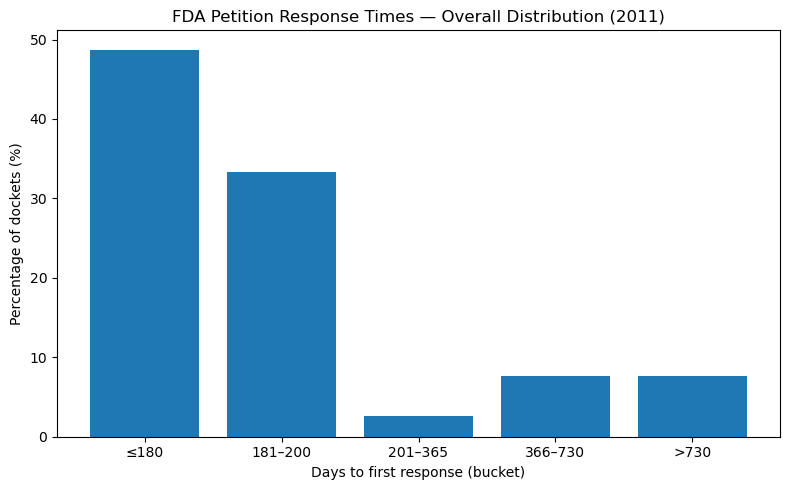

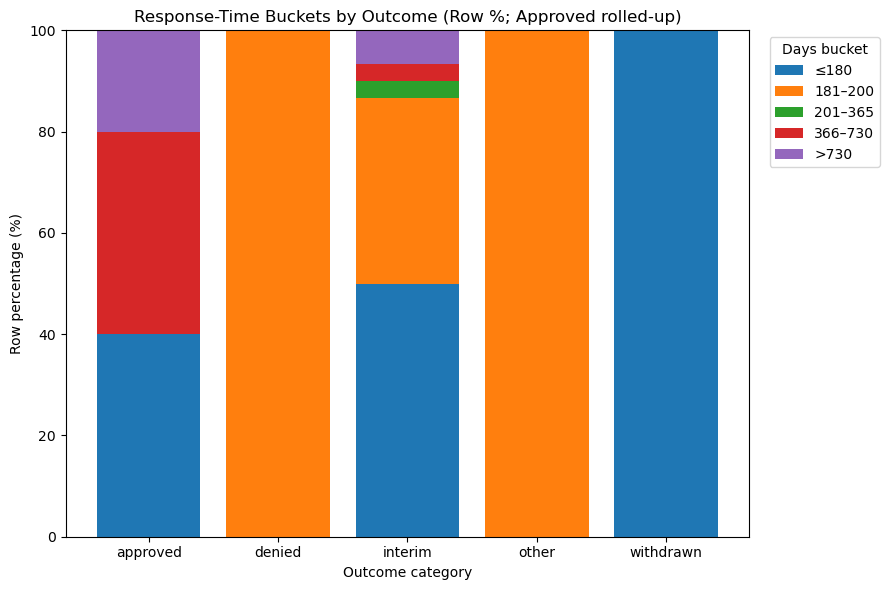

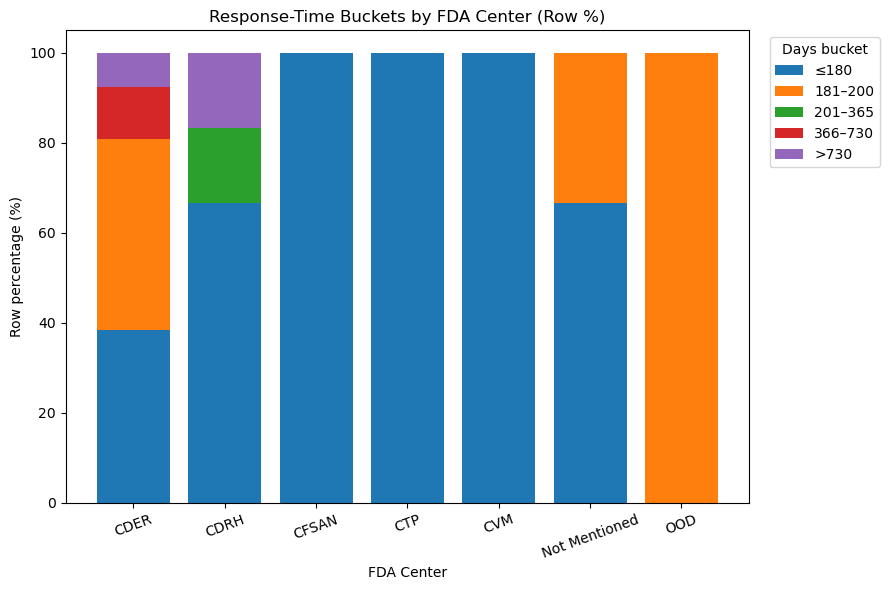

Headline: 48.7% within 180 days; 82.1% within 200 days; median = 181 days.


In [38]:
# Rebuild agg_valid if missing, then visualize response-time % (overall, by outcome, by center)
import pandas as pd, numpy as np, matplotlib.pyplot as plt, re

# ---------- 0) Pick already-loaded frames (no file IO) ----------
if "petitions_2011" in globals() and "responses_2011" in globals():
    df_pet = petitions_2011.copy()
    df_resp = responses_2011.copy()
elif "petitions_2011" in globals() and "responses_2011" in globals():
    df_pet = petitions_2011.copy()
    df_resp = responses_2011.copy()
else:
    raise RuntimeError("Please make sure either (petitions_201, responses_201) or (petitions_2011, responses_2011) are defined.")

# ---------- 1) Helper functions ----------
def _extract_docket_id(filename: str):
    m = re.search(r"FDA-\d{4}-P-\d{4}", str(filename))
    return m.group(0) if m else None

def _find_col(df, must_include=None, also_include=None):
    must_include = [s.lower() for s in (must_include or [])]
    also_include = [s.lower() for s in (also_include or [])]
    for c in df.columns:
        low = c.lower()
        if all(s in low for s in must_include) and all(s in low for s in also_include):
            return c
    return None

def _classify_response(text):
    if pd.isna(text): return "missing"
    t = str(text).lower()
    if "approved" in t:
        return "partially approved" if "partially" in t else "approved"
    if "denied" in t: return "denied"
    if "withdraw" in t: return "withdrawn"
    if any(k in t for k in ["interim","tentative","pending","review","evaluating"]): return "interim"
    if "other" in t: return "other"
    return "uncategorized"

# ---------- 2) Ensure Docket_ID ----------
if "Docket_ID" not in df_pet.columns:
    df_pet["Docket_ID"] = df_pet["File Name"].apply(_extract_docket_id)
if "Docket_ID" not in df_resp.columns:
    df_resp["Docket_ID"] = df_resp["File Name"].apply(_extract_docket_id)

# ---------- 3) Detect date columns ----------
pet_date_col = _find_col(df_pet, must_include=["date"], also_include=["petition"]) \
    or _find_col(df_pet, must_include=["date of petition"]) \
    or _find_col(df_pet, must_include=["petition date"])
resp_date_col = _find_col(df_resp, must_include=["date"], also_include=["response"]) \
    or _find_col(df_resp, must_include=["date of response"]) \
    or _find_col(df_resp, must_include=["response date"])

if not pet_date_col or not resp_date_col:
    raise KeyError(f"Could not detect date columns. Petition: {pet_date_col}, Response: {resp_date_col}")

# ---------- 4) Build agg_valid (earliest petition & earliest response per docket) ----------
pet_agg = (
    df_pet.assign(PetitionDate=pd.to_datetime(df_pet[pet_date_col], errors="coerce"))
          .groupby("Docket_ID", dropna=True, as_index=False)["PetitionDate"].min()
)
resp_agg = (
    df_resp.assign(ResponseDate=pd.to_datetime(df_resp[resp_date_col], errors="coerce"))
           .groupby("Docket_ID", dropna=True, as_index=False)["ResponseDate"].min()
)

agg = pd.merge(pet_agg, resp_agg, on="Docket_ID", how="inner")
agg["Response_Days"] = (agg["ResponseDate"] - agg["PetitionDate"]).dt.days
agg_valid = agg.dropna(subset=["Response_Days"])
agg_valid = agg_valid[agg_valid["Response_Days"] >= 0].copy()

print(f"Merged dockets with valid dates: {len(agg_valid)}")

# ---------- 5) Build merged_speed for viz (attach earliest response text/center) ----------
df_resp = df_resp.assign(_RespDate=pd.to_datetime(df_resp[resp_date_col], errors="coerce"))
first_resp = (
    df_resp.sort_values(["Docket_ID", "_RespDate"])
           .drop_duplicates("Docket_ID", keep="first")
           .loc[:, ["Docket_ID", "_RespDate", "Response to Petition", "Responding FDA Center"]]
           .rename(columns={"Response to Petition":"Response_Text", "Responding FDA Center":"FDA_Center"})
)

merged_speed = agg_valid.merge(first_resp, on="Docket_ID", how="left")
merged_speed["Response_Category"] = merged_speed["Response_Text"].apply(_classify_response)

# ---------- 6) Buckets & tables ----------
bins   = [-0.1, 180, 200, 365, 730, np.inf]
labels = ["≤180", "181–200", "201–365", "366–730", ">730"]
merged_speed["Speed_Bucket"] = pd.cut(merged_speed["Response_Days"], bins=bins, labels=labels)

overall_counts = merged_speed["Speed_Bucket"].value_counts(dropna=False).reindex(labels, fill_value=0)
overall_rates  = (overall_counts / overall_counts.sum() * 100).round(2).rename("Rate (%)")
overall_table  = pd.concat([overall_counts.rename("Count"), overall_rates], axis=1)
display(overall_table)

merged_speed["Outcome_Rollup"] = merged_speed["Response_Category"].replace({"partially approved":"approved"})
by_outcome_rollup = pd.crosstab(merged_speed["Outcome_Rollup"], merged_speed["Speed_Bucket"], normalize="index") * 100
by_outcome_rollup = by_outcome_rollup.reindex(columns=labels).round(2)
display(by_outcome_rollup)

has_center = "FDA_Center" in merged_speed.columns
if has_center:
    by_center = pd.crosstab(merged_speed["FDA_Center"], merged_speed["Speed_Bucket"], normalize="index") * 100
    by_center = by_center.reindex(columns=labels).round(2)
    display(by_center)

# ---------- 7) Charts ----------
plt.figure(figsize=(8,5))
plt.bar(overall_table.index.astype(str), overall_table["Rate (%)"])
plt.title("FDA Petition Response Times — Overall Distribution (2011)")
plt.xlabel("Days to first response (bucket)")
plt.ylabel("Percentage of dockets (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

rollup = by_outcome_rollup.fillna(0)
plt.figure(figsize=(9,6))
bottom = np.zeros(len(rollup.index))
for bucket in rollup.columns:
    vals = rollup[bucket].values
    plt.bar(rollup.index.astype(str), vals, bottom=bottom, label=bucket)
    bottom += vals
plt.title("Response-Time Buckets by Outcome (Row %; Approved rolled-up)")
plt.xlabel("Outcome category")
plt.ylabel("Row percentage (%)")
plt.legend(title="Days bucket", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

if has_center:
    center_plot = by_center.fillna(0)
    plt.figure(figsize=(9,6))
    bottom = np.zeros(len(center_plot.index))
    for bucket in center_plot.columns:
        vals = center_plot[bucket].values
        plt.bar(center_plot.index.astype(str), vals, bottom=bottom, label=bucket)
        bottom += vals
    plt.title("Response-Time Buckets by FDA Center (Row %)")
    plt.xlabel("FDA Center")
    plt.ylabel("Row percentage (%)")
    plt.xticks(rotation=20)
    plt.legend(title="Days bucket", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# ---------- 8) Headline ----------
within_180 = (merged_speed["Response_Days"] <= 180).mean() * 100
within_200 = (merged_speed["Response_Days"] <= 200).mean() * 100
median_days = merged_speed["Response_Days"].median()
print(f"Headline: {within_180:.1f}% within 180 days; {within_200:.1f}% within 200 days; median = {median_days:.0f} days.")


          Category  Count (2011)  \
0            Drugs            77   
1             Food             3   
2  Medical Devices             7   
3        Cosmetics             1   
4            Other            18   

                                       Typical Focus  
0  ANDA/NDA, labeling changes, withdrawals/recons...  
1  Additives, labeling, contamination, ingredient...  
2               LASIK/devices, implants, diagnostics  
3           Safety and labeling of cosmetic products  
4                  Unclassified/insufficient context  


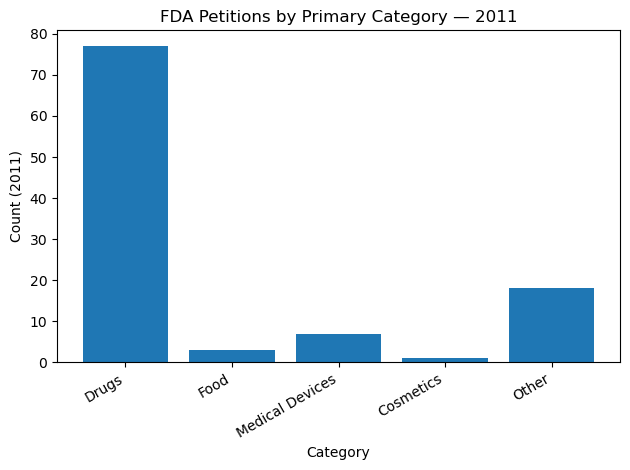

In [40]:

PETITIONS_XLSX = "petition_results (9).xlsx"        # change path if needed
RESPONSES_XLSX = "response_results (2).xlsx"        # optional, not required for counts
OUT_CSV        = "fda_2011_petition_categories.csv"

CAT_KEYWORDS = {
    "Drugs": [r"drug", r"\bnda\b", r"\banda\b", r"pharmaceutical", r"medicine", r"medication", r"\bcder\b"],
    "Food": [r"\bfood\b", r"additive", r"ingredient", r"labeling", r"contamination", r"poison", r"dietary supplement"],
    "Medical Devices": [r"device", r"\bpma\b", r"implant", r"diagnostic", r"laser", r"\bcd rh?\b", r"lasik"],
    "Animal Drugs": [r"animal", r"veterinary", r"\bfeed\b", r"fodder"],
    "Tobacco": [r"tobacco", r"cigarette", r"nicotine"],
    "Cosmetics": [r"cosmetic", r"beauty", r"cream", r"skin"],
    "Biologics": [r"vaccine", r"biologic", r"blood", r"gene therapy", r"\bcber\b"],
}

CAT_PRIORITY = ["Drugs", "Food", "Medical Devices", "Animal Drugs", "Tobacco", "Cosmetics", "Biologics"]

CAT_DESC = {
    "Drugs": "ANDA/NDA, labeling changes, withdrawals/reconsiderations, safety concerns",
    "Food": "Additives, labeling, contamination, ingredient safety",
    "Medical Devices": "LASIK/devices, implants, diagnostics",
    "Animal Drugs": "Veterinary medicines and feed additives",
    "Tobacco": "Regulation of nicotine and cigarette products",
    "Cosmetics": "Safety and labeling of cosmetic products",
    "Biologics": "Vaccines or other biological products",
    "Other": "Unclassified/insufficient context",
}

def load_petitions(path):
    df = pd.read_excel(path)
    df["Date of Petition"] = pd.to_datetime(df["Date of Petition"], errors="coerce")
    df = df[df["Date of Petition"].dt.year == 2011].copy()
    for c in ["FDA Action Commented On", "Requested Action", "Justification for Request"]:
        if c not in df.columns:
            df[c] = ""
    df["_text"] = (
        df["FDA Action Commented On"].fillna("").astype(str) + " " +
        df["Requested Action"].fillna("").astype(str) + " " +
        df["Justification for Request"].fillna("").astype(str)
    ).str.lower()
    return df

def build_patterns():
    return {cat: [re.compile(p, re.I) for p in pats] for cat, pats in CAT_KEYWORDS.items()}

def primary_category(text, compiled_patterns):
    for cat in CAT_PRIORITY:
        if any(p.search(text) for p in compiled_patterns[cat]):
            return cat
    return "Other"

def summarize(df):
    compiled = build_patterns()
    df["Primary Category"] = df["_text"].apply(lambda t: primary_category(t, compiled))
    counts = df["Primary Category"].value_counts()
    ordered = [c for c in CAT_PRIORITY if c in counts.index]
    if "Other" in counts.index:
        ordered += ["Other"]
    out = pd.DataFrame({
        "Category": ordered,
        "Count (2011)": [int(counts[c]) for c in ordered],
        "Typical Focus": [CAT_DESC.get(c, "") for c in ordered]
    })
    return out

def main():
    petitions = load_petitions(PETITIONS_XLSX)
    summary = summarize(petitions)
    summary.to_csv(OUT_CSV, index=False)
    print(summary)

    # Plot
    plt.figure()
    plt.bar(summary["Category"], summary["Count (2011)"])
    plt.title("FDA Petitions by Primary Category — 2011")
    plt.xlabel("Category")
    plt.ylabel("Count (2011)")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Decision         approved  interim  no response  other  withdrawn  denied  \
Category                                                                    
Drugs                   8       23           44      6          5       0   
Other                   1        8            9      0          1       0   
Medical Devices         0        5            0      1          3       0   
Food                    0        2            1      1          0       0   
Cosmetics               0        0            1      0          0       0   

Decision         total  approved_rate  denied_rate  withdrawn_rate  \
Category                                                             
Drugs               86       0.093023          0.0        0.058140   
Other               19       0.052632          0.0        0.052632   
Medical Devices      9       0.000000          0.0        0.333333   
Food                 4       0.000000          0.0        0.000000   
Cosmetics            1       0.000000   

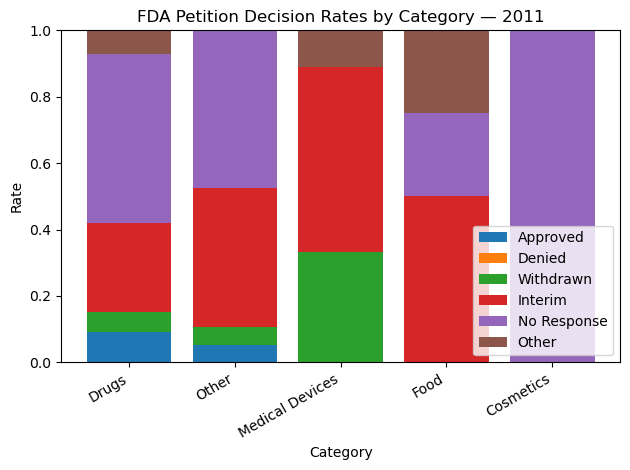

In [42]:
OUT_SUMMARY_CSV = "fda_2011_decision_rates_by_category.csv"

CAT_KEYWORDS = {
    "Drugs": [r"drug", r"\bnda\b", r"\banda\b", r"pharmaceutical", r"medicine", r"medication", r"\bcder\b"],
    "Food": [r"\bfood\b", r"additive", r"ingredient", r"labeling", r"contamination", r"poison", r"dietary supplement"],
    "Medical Devices": [r"device", r"\bpma\b", r"implant", r"diagnostic", r"laser", r"lasik", r"\bcdrh\b"],
    "Animal Drugs": [r"animal", r"veterinary", r"\bfeed\b", r"fodder"],
    "Tobacco": [r"tobacco", r"cigarette", r"nicotine"],
    "Cosmetics": [r"cosmetic", r"beauty", r"cream", r"skin"],
    "Biologics": [r"vaccine", r"biologic", r"blood", r"gene therapy", r"\bcber\b"],
}
CAT_PRIORITY = ["Drugs", "Food", "Medical Devices", "Animal Drugs", "Tobacco", "Cosmetics", "Biologics"]

def extract_docket(s: str):
    m = re.search(r"FDA-\d{4}-P-\d{4}", str(s))
    return m.group(0) if m else None

compiled = {c:[re.compile(p, re.I) for p in pats] for c,pats in CAT_KEYWORDS.items()}

def categorize(text: str) -> str:
    t = str(text or "").lower()
    for cat in CAT_PRIORITY:
        if any(p.search(t) for p in compiled[cat]):
            return cat
    return "Other"

def classify_decision(resp: str) -> str:
    if pd.isna(resp) or str(resp).strip()=="":
        return "no response"
    r = str(resp).lower()
    if "deny" in r: return "denied"
    if "approve" in r: return "approved"
    if "withdraw" in r: return "withdrawn"
    if any(k in r for k in ["interim","pending","review"]): return "interim"
    return "other"

def main():
    pet = pd.read_excel(PETITIONS_XLSX)
    res = pd.read_excel(RESPONSES_XLSX)

    pet["docket_id"] = pet["File Name"].apply(extract_docket)
    res["docket_id"] = res["File Name"].apply(extract_docket)

    pet["Date of Petition"] = pd.to_datetime(pet["Date of Petition"], errors="coerce")
    pet11 = pet[pet["Date of Petition"].dt.year == 2011].copy()

    for c in ["FDA Action Commented On", "Requested Action", "Justification for Request"]:
        if c not in pet11.columns: pet11[c] = ""

    pet11["_text"] = (
        pet11["FDA Action Commented On"].fillna("").astype(str) + " " +
        pet11["Requested Action"].fillna("").astype(str) + " " +
        pet11["Justification for Request"].fillna("").astype(str)
    )
    pet11["Category"] = pet11["_text"].apply(categorize)

    merged = pd.merge(
        pet11,
        res[["docket_id","Response to Petition","Responding FDA Center"]],
        on="docket_id", how="left"
    )
    merged["Decision"] = merged["Response to Petition"].apply(classify_decision)

    counts = merged.pivot_table(index="Category", columns="Decision", aggfunc="size", fill_value=0)
    for col in ["approved","denied","withdrawn","interim","no response","other"]:
        if col not in counts.columns: counts[col] = 0

    counts["total"] = counts.sum(axis=1)
    for col in ["approved","denied","withdrawn","interim","no response","other"]:
        counts[f"{col}_rate"] = counts[col] / counts["total"]

    counts = counts.sort_values("total", ascending=False)
    counts.to_csv(OUT_SUMMARY_CSV)
    print(counts)

    # Stacked bar of rates per category
    rate_cols = ["approved_rate","denied_rate","withdrawn_rate","interim_rate","no response_rate","other_rate"]
    plot_df = counts[rate_cols].fillna(0)

    plt.figure()
    bottom = np.zeros(len(plot_df))
    for col in rate_cols:
        plt.bar(plot_df.index, plot_df[col].values, bottom=bottom, label=col.replace("_rate","").title())
        bottom += plot_df[col].values
    plt.title("FDA Petition Decision Rates by Category — 2011")
    plt.ylabel("Rate")
    plt.xlabel("Category")
    plt.xticks(rotation=30, ha="right")
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
